# Analysis of Medicare Part D Prescribing Trends for GLP-1 Agonists (2014-2023)

data source(for public use): <href>https://catalog.data.gov/dataset/medicare-part-d-prescribers-by-geography-and-drug-d1df1</href> (new)
data source(for public use): <href>https://catalog.data.gov/dataset/medicare-part-d-prescribers-by-geography-and-drug-67fb0</href> (old)

## 1. Introduction

### Background and Motivation

GLP-1 (Glucagon-like peptide-1) agonists represent a significant and rapidly evolving class of medications used primarily for the management of type 2 diabetes and, increasingly, for obesity. Their impact on clinical outcomes and healthcare spending has drawn considerable attention. Understanding the prescribing trends of these agents within large patient populations, such as Medicare beneficiaries, is crucial for healthcare providers, policymakers, and pharmaceutical market analysts. This project aims to analyze the utilization patterns and associated costs of GLP-1 agonists within the US Medicare Part D program using publicly available data. As a pharmacist, I bring domain expertise to interpret these trends within a clinical and market context.

### Data Source

The primary data source for this analysis is the publicly available **Medicare Part D Prescribers - by Geography and Drug** dataset provided by the Centers for Medicare & Medicaid Services (CMS), covering the years 2014 through 2023. (*Note: Data for 2024 was not available at the time of analysis in April 2025.*)

### Key Questions

This analysis seeks to answer the following questions regarding GLP-1 agonist prescribing trends in Medicare Part D:

1.  How have the overall number of beneficiaries using GLP-1 agonists and the total drug costs changed from 2014 to 2023?
2.  Which specific GLP-1 agonists (generic and brand names) have shown the most significant growth in utilization during this period?
3.  How do prescribing trends vary geographically? (This analysis includes a focused case study on Georgia.)
4.  Is there an observable relationship between the dosage frequency (e.g., once-daily vs. once-weekly) of GLP-1 agonists and their utilization trends or market share?
5.  How have the market shares and average costs per beneficiary for different GLP-1 agonists evolved over time, particularly within the Georgia context?

## 2. Data Loading and Preparation
### 2.1. Import Libraries

In [50]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, PercentFormatter
import seaborn as sns
import glob
import os

### 2.2. Load Data (2014 - 2023)

In [51]:
# Import Medicare Part D Prescribers - by Geography and Drug csv files for last 10 years
# df2023 = pd.read_csv('Raw Data CSV/MUP_DPR_RY25_P04_V10_DY23_Geo.csv', low_memory=False)
# df2022 = pd.read_csv('Raw Data CSV/MUP_DPR_RY24_P04_V10_DY22_Geo.csv', low_memory=False)
# df2021 = pd.read_csv('Raw Data CSV/MUP_DPR_RY23_P04_V10_DY21_Geo.csv', low_memory=False)
# df2020 = pd.read_csv('Raw Data CSV/MUP_DPR_RY22_P04_V10_DY20_Geo.csv', low_memory=False)
# df2019 = pd.read_csv('Raw Data CSV/MUP_DPR_RY21_P04_V10_DY19_Geo.csv', low_memory=False)
# df2018 = pd.read_csv('Raw Data CSV/MUP_DPR_RY21_P04_V10_DY18_Geo.csv', low_memory=False)
# df2017 = pd.read_csv('Raw Data CSV/MUP_DPR_RY21_P04_V10_DY17_Geo.csv', low_memory=False)
# df2016 = pd.read_csv('Raw Data CSV/MUP_DPR_RY21_P04_V10_DY16_Geo.csv', low_memory=False)
# df2015 = pd.read_csv('Raw Data CSV/MUP_DPR_RY21_P04_V10_DY15_Geo.csv', low_memory=False)
# df2014 = pd.read_csv('Raw Data CSV/MUP_DPR_RY21_P04_V10_DY14_Geo.csv', low_memory=False)

# 1. 효율적인 파일 로딩 (List Comprehension & Loop 사용)
path = 'Raw Data CSV/'
all_files = sorted(glob.glob(os.path.join(path, "*.csv")), reverse=True) # 최신순 정렬

dfs = []
for filename in all_files:
    # 파일명에서 연도 추출 (예: ...DY23_Geo.csv -> 2023)
    # 파일명 규칙에 따라 index는 조절 필요. 예시: 'DY' 뒤의 숫자 추출 로직
    # 여기서는 간단히 루프 돌면서 연도를 수동 리스트와 매핑하거나 파일명 파싱 추천
    df = pd.read_csv(filename, low_memory=False)
    
    # 필요한 컬럼만 선택 (메모리 절약)
    df = df[columns_to_keep]
    
    # Year 컬럼 추가 (파일명이나 로직에 따라 동적으로 할당 추천)
    # 예시: 연도 리스트를 zip으로 묶어서 처리
    dfs.append(df)

# 연도 할당 로직이 복잡하면, 딕셔너리나 리스트로 관리하는 게 10줄 복붙보다 낫습니다.
# 하지만 10개 정도면 지금 방식도 치명적이진 않으나, 아래와 같은 방식이 더 개발자스럽습니다.

years = range(2023, 2013, -1) # 2023 to 2014
df_list = []

for year in years:
    # 파일명 규칙에 맞춰 f-string 사용
    dy_code = str(year - 2000) # 2023 -> 23
    file_path = f'Raw Data CSV/MUP_DPR_RY{int(dy_code)+2}_P04_V10_DY{dy_code}_Geo.csv' 
    # (참고: RY(Report Year)와 DY(Data Year) 규칙 확인 필요)
    
    if os.path.exists(file_path):
        temp_df = pd.read_csv(file_path, low_memory=False)
        temp_df = temp_df[columns_to_keep] # 컬럼 필터링 먼저 (속도 향상)
        temp_df['Year'] = year
        df_list.append(temp_df)

df10yrs = pd.concat(df_list, ignore_index=True)

### 2.3. Initial Data Inspection

In [52]:
# Check descriptive statistics for one dataframe and loopkup the columns and data types
df2023.info()
df2023.describe()
df2023.head()

df2022.info()
df2022.describe()
df2022.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115936 entries, 0 to 115935
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Prscrbr_Geo_Desc  115935 non-null  object 
 1   Brnd_Name         115936 non-null  object 
 2   Gnrc_Name         115936 non-null  object 
 3   Tot_Prscrbrs      115936 non-null  int64  
 4   Tot_Clms          115936 non-null  int64  
 5   Tot_Drug_Cst      115936 non-null  float64
 6   Tot_Benes         94340 non-null   float64
 7   Year              115936 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 7.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115396 entries, 0 to 115395
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Prscrbr_Geo_Desc  115396 non-null  object 
 1   Brnd_Name         115396 non-null  object 
 2   Gnrc_Name         115396 non-null  object

,Prscrbr_Geo_Desc,Brnd_Name,Gnrc_Name,Tot_Prscrbrs,Tot_Clms,Tot_Drug_Cst,Tot_Benes,Year
0,National,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1061,2501,70039.61,1147.0,2022
1,National,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1372,3846,114601.54,1474.0,2022
2,National,Abacavir,Abacavir Sulfate,3161,24329,6950841.50,3453.0,2022
3,National,Abacavir-Lamivudine,Abacavir Sulfate/Lamivudine,2635,24999,11964197.97,3426.0,2022
4,National,Abacavir-Lamivudine-Zidovudine,Abacavir/Lamivudine/Zidovudine,15,59,68772.61,15.0,2022


### 2.4. Data Cleaning (Column Selection, Merging)
There are 22 columns, but the data I'm interested to analyze are brand and generic drug name of **GLP-1 agonists** and associated total prescribers, total claims, total drug cost, and total beneficieries. Therefore, I only need to take the following columns:
- Prscrbr_Geo_Desc
- Brnd_Name
- Gnrc_Name
- Tot_Prscrbrs
- Tot_Clms
- Tot_Drug_Cst
- Tot_Benes

In [53]:
# Columns to keep for analysis
columns_to_keep = [
    'Prscrbr_Geo_Desc',
    'Brnd_Name',
    'Gnrc_Name',
    'Tot_Prscrbrs',
    'Tot_Clms',
    'Tot_Drug_Cst',
    'Tot_Benes'
]

# select above columns only and assign it to each yealy dataframe
df2023 = df2023[columns_to_keep]
df2022 = df2022[columns_to_keep]
df2021 = df2021[columns_to_keep]
df2020 = df2020[columns_to_keep]
df2019 = df2019[columns_to_keep]
df2018 = df2018[columns_to_keep]
df2017 = df2017[columns_to_keep]
df2016 = df2016[columns_to_keep]
df2015 = df2015[columns_to_keep]
df2014 = df2014[columns_to_keep]

In [54]:
# Check a dataframe to see desired columns are selected corretly
df2014.head(1)

,Prscrbr_Geo_Desc,Brnd_Name,Gnrc_Name,Tot_Prscrbrs,Tot_Clms,Tot_Drug_Cst,Tot_Benes
0,National,1st Tier Unifine Pentips,"Needles, Insulin Disposable",1424,5314,114339.09,1874.0


Since a generic name of drug can have multiple brand names depending on their FDA indication and dosage forms, it would be better to filter the data with generic names of GLP-1 agonists that are currently available in the US market.

In [55]:
# Generic names of GLP-1 Agonists currently marketed in US
glp1_agonists_generic_names = [
    'exenatide',
    'semaglutide',
    'dulaglutide',
    'liraglutide',
    'lixisenatide',
    'tirzepatide'    
]

In [56]:
# Add a 'Year' column to each dataframe
df2023['Year'] = 2023
df2022['Year'] = 2022
df2021['Year'] = 2021
df2020['Year'] = 2020
df2019['Year'] = 2019
df2018['Year'] = 2018
df2017['Year'] = 2017
df2016['Year'] = 2016
df2015['Year'] = 2015
df2014['Year'] = 2014
# Concatenate all dataframes into a single dataframe
df10yrs = pd.concat([
    df2023, df2022, df2021, df2020, df2019,
    df2018, df2017, df2016, df2015, df2014
], ignore_index=True)

In [57]:
df10yrs.info()
df10yrs.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1126791 entries, 0 to 1126790
Data columns (total 8 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Prscrbr_Geo_Desc  1126763 non-null  object 
 1   Brnd_Name         1126791 non-null  object 
 2   Gnrc_Name         1126791 non-null  object 
 3   Tot_Prscrbrs      1126791 non-null  int64  
 4   Tot_Clms          1126791 non-null  int64  
 5   Tot_Drug_Cst      1126791 non-null  float64
 6   Tot_Benes         920558 non-null   float64
 7   Year              1126791 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 68.8+ MB


,Tot_Prscrbrs,Tot_Clms,Tot_Drug_Cst,Tot_Benes,Year
count,1.126791e+06,1.126791e+06,1.126791e+06,9.205580e+05,1.126791e+06
mean,1.536752e+03,2.662780e+04,3.265780e+06,8.983802e+03,2.018572e+03
std,1.366378e+04,4.345811e+05,5.286801e+07,1.198849e+05,2.862989e+00
min,1.000000e+00,1.100000e+01,0.000000e+00,1.100000e+01,2.014000e+03
25%,1.400000e+01,5.200000e+01,1.329473e+04,3.800000e+01,2.016000e+03
50%,6.300000e+01,2.820000e+02,9.427336e+04,1.660000e+02,2.019000e+03
75%,4.270000e+02,2.575000e+03,6.375971e+05,1.259000e+03,2.021000e+03
max,7.253030e+05,6.846728e+07,1.826613e+10,1.677038e+07,2.023000e+03


### 2.5. Handling Missing Values (`Tot_Benes`)
Now the combined dataframe has data for between 2014 and 2024 and the total row is 1126791, over 1.1 Million. As shown, many null values exist in Prscrbr_Geo_Desc and Tot_Benes columns.

In [58]:
# Check null values by column
df10yrs.isnull().sum()

Prscrbr_Geo_Desc        28
Brnd_Name                0
Gnrc_Name                0
Tot_Prscrbrs             0
Tot_Clms                 0
Tot_Drug_Cst             0
Tot_Benes           206233
Year                     0
dtype: int64

### 2.6. Filtering for GLP-1 Agonists

In [59]:
# Filter the dataframe with generic names of GLP-1 Agonists, then check any null values
glp1_df = df10yrs[df10yrs['Gnrc_Name'].str.lower().str.contains('|'.join(glp1_agonists_generic_names), na=False)].copy()
glp1_df.isnull().sum()
glp1_df.describe()

,Tot_Prscrbrs,Tot_Clms,Tot_Drug_Cst,Tot_Benes,Year
count,4708.000000,4.708000e+03,4.708000e+03,4.507000e+03,4708.000000
mean,1876.099830,2.433012e+04,2.953041e+07,5.476759e+03,2019.145285
std,9844.792845,1.859380e+05,2.440808e+08,3.808759e+04,2.692696
min,1.000000,1.100000e+01,4.748200e+03,1.100000e+01,2014.000000
25%,107.000000,5.445000e+02,5.255064e+05,1.760000e+02,2017.000000
50%,376.500000,2.518500e+03,2.339881e+06,6.750000e+02,2019.000000
75%,1156.000000,9.602750e+03,9.567544e+06,2.485000e+03,2021.000000
max,254476.000000,6.925667e+06,9.190972e+09,1.463887e+06,2023.000000


In [60]:
# Replace null values with average of Tot_Benes since the number of nulls are too many to drop
# mean_tot_benes = glp1_df['Tot_Benes'].mean()
# glp1_df['Tot_Benes'] = glp1_df['Tot_Benes'].fillna(mean_tot_benes)

# Missing values in CMS data often imply suppression due to low counts (<11).
# Filling with 0 is statistically safer than mean imputation for this dataset.
glp1_df['Tot_Benes'] = glp1_df['Tot_Benes'].fillna(0)

In [61]:
glp1_df.info()
glp1_df.isnull().sum()
glp1_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4708 entries, 439 to 1125329
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Prscrbr_Geo_Desc  4708 non-null   object 
 1   Brnd_Name         4708 non-null   object 
 2   Gnrc_Name         4708 non-null   object 
 3   Tot_Prscrbrs      4708 non-null   int64  
 4   Tot_Clms          4708 non-null   int64  
 5   Tot_Drug_Cst      4708 non-null   float64
 6   Tot_Benes         4708 non-null   float64
 7   Year              4708 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 331.0+ KB


,Prscrbr_Geo_Desc,Brnd_Name,Gnrc_Name,Tot_Prscrbrs,Tot_Clms,Tot_Drug_Cst,Tot_Benes,Year
439,National,Bydureon Bcise,Exenatide Microspheres,34075,212648,2.838735e+08,45828.0,2023
440,National,Bydureon Pen,Exenatide Microspheres,45,64,6.084105e+04,45.0,2023
441,National,Byetta,Exenatide,3739,14038,2.063854e+07,3394.0,2023
2051,National,Mounjaro,Tirzepatide,118860,1820883,2.360646e+09,370074.0,2023
2348,National,Ozempic,Semaglutide,254476,6925667,9.190972e+09,1463887.0,2023


In [62]:
# Filter glp1_df by Group By Geographic condition is Georgia state.
# Then, Group by Year, Gnrc_Name to aggregate Tot_Benes and Tot_Drug_Cst columns data
georgia_data = glp1_df[glp1_df['Prscrbr_Geo_Desc']=='Georgia'].copy()
georgia_agg_trends = georgia_data.groupby(['Year', 'Gnrc_Name'])[['Tot_Benes', 'Tot_Drug_Cst']].sum().reset_index()
georgia_agg_trends.head()

,Year,Gnrc_Name,Tot_Benes,Tot_Drug_Cst
0,2014,Exenatide,1490.0,3799413.76
1,2014,Exenatide Microspheres,1148.0,2585242.74
2,2014,Liraglutide,5611.0,13711964.31
3,2015,Dulaglutide,560.0,1059952.93
4,2015,Exenatide,1164.0,3504467.11


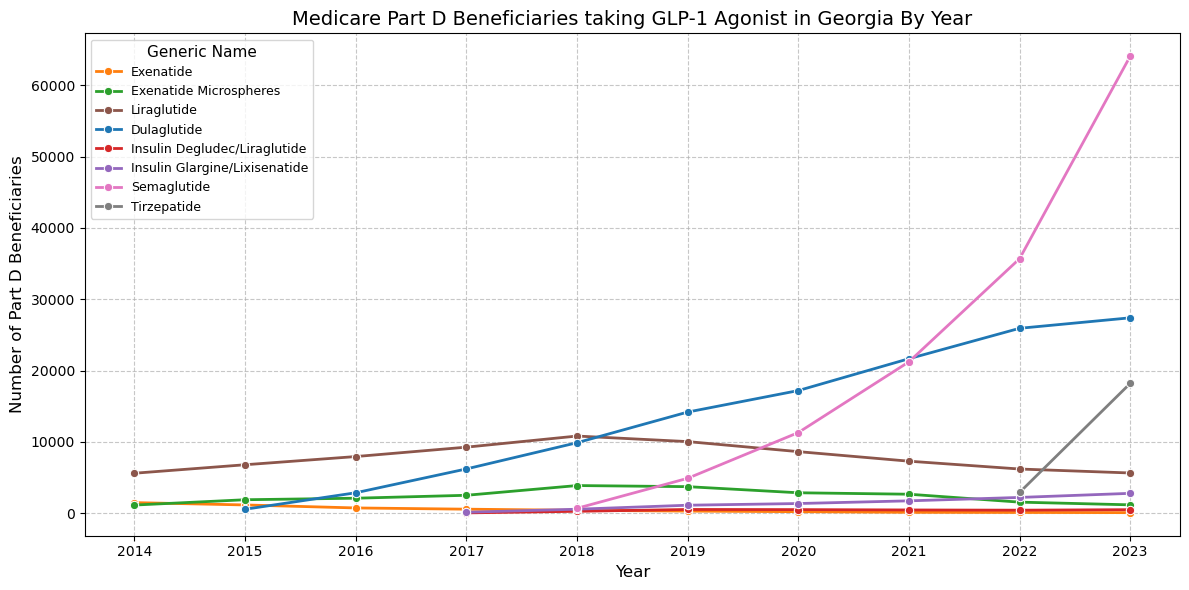


Medicare Part D Beneficiaries taking GLP-1 Agonist in Georgia By Year:
Gnrc_Name  Dulaglutide  Exenatide  Exenatide Microspheres  \
Year                                                        
2014               NaN     1490.0                  1148.0   
2015             560.0     1164.0                  1895.0   
2016            2872.0      744.0                  2109.0   
2017            6213.0      571.0                  2519.0   
2018            9889.0      415.0                  3883.0   
2019           14186.0      302.0                  3729.0   
2020           17200.0      221.0                  2871.0   
2021           21666.0      130.0                  2669.0   
2022           25931.0      111.0                  1558.0   
2023           27402.0       86.0                  1180.0   

Gnrc_Name  Insulin Degludec/Liraglutide  Insulin Glargine/Lixisenatide  \
Year                                                                     
2014                                NaN        

<Figure size 1200x600 with 0 Axes>

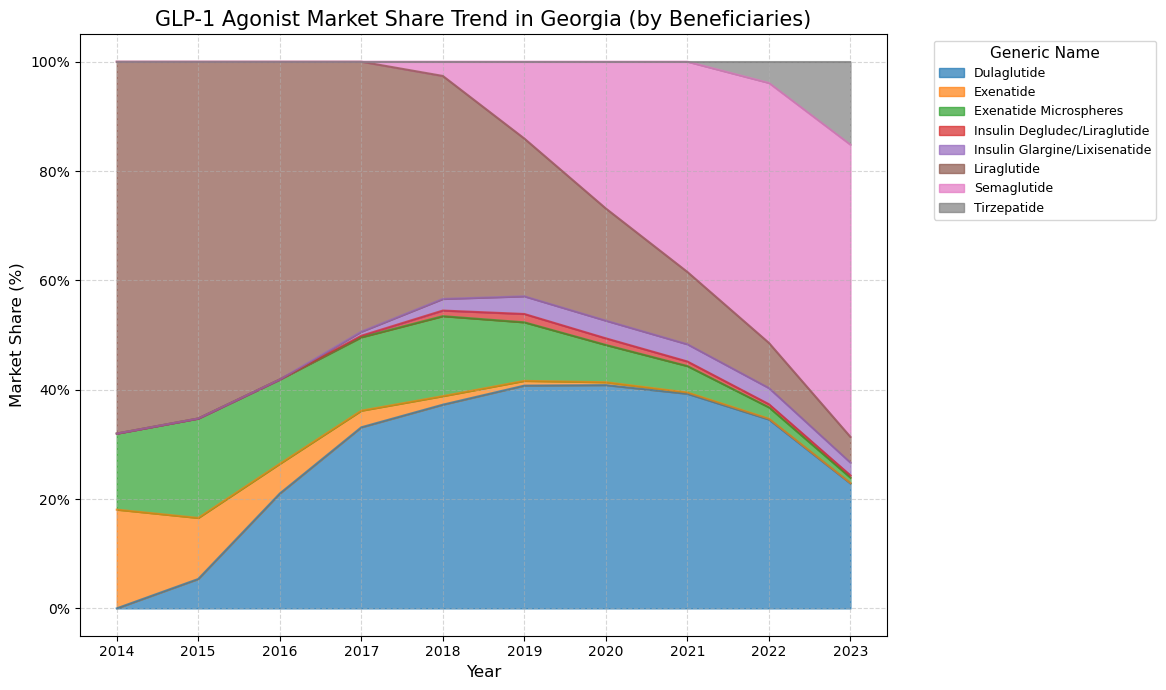

Gnrc_Name  Dulaglutide  Exenatide  Exenatide Microspheres  \
Year                                                        
2014          0.000000  18.062795               13.916838   
2015          5.374796  11.171897               18.187926   
2016         21.003364   5.440983               15.423431   
2017         33.120102   3.043872               13.428221   
2018         37.257931   1.563560               14.629644   
2019         40.745634   0.867417               10.710593   
2020         40.840556   0.524754                6.817049   
2021         39.252844   0.235524                4.835495   
2022         34.549330   0.147892                2.075811   
2023         22.854426   0.071728                0.984170   

Gnrc_Name  Insulin Degludec/Liraglutide  Insulin Glargine/Lixisenatide  \
Year                                                                     
2014                           0.000000                       0.000000   
2015                           0.000000      

In [ ]:
# Data Visualization

# Color mapping for each drug to display consistent data visualization
unique_drugs = sorted(georgia_agg_trends['Gnrc_Name'].unique())
palette = sns.color_palette('tab10', n_colors=len(unique_drugs))
color_map = dict(zip(unique_drugs, palette))

# Line plot: Medicare Part D beneficieries taking GLP-1 Agonist in Georgia By Year
plt.figure(figsize=(12, 6))
sns.lineplot(data=georgia_agg_trends, x='Year', y='Tot_Benes', hue='Gnrc_Name', marker='o', linewidth=2, palette=color_map)
plt.title('Medicare Part D Beneficiaries taking GLP-1 Agonist in Georgia By Year', fontsize=14)
plt.ylabel('Number of Part D Beneficiaries', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(georgia_agg_trends['Year'].unique())   # Ensure all years are shown as ticks
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Generic Name', title_fontsize=11, fontsize=9)
plt.tight_layout()
plt.show()

# Pivot Table
pivot_table_ga = georgia_agg_trends.pivot(index='Year', columns='Gnrc_Name', values='Tot_Benes')
print("\nMedicare Part D Beneficiaries taking GLP-1 Agonist in Georgia By Year:")
print(pivot_table_ga)

# GLP-1 Agonist Market Share Percentage By Year Calculation
georgia_agg_trends['Tot_Benes_Year'] = georgia_agg_trends.groupby('Year')['Tot_Benes'].transform('sum')
georgia_agg_trends['Market_Share_Percent'] = georgia_agg_trends['Tot_Benes'] / georgia_agg_trends['Tot_Benes_Year'] * 100

# Stacked Area Chart: Yearly Market Share Percentage Visualization 
plt.figure(figsize=(12, 6))
market_share_pivot = georgia_agg_trends.pivot(index='Year', columns='Gnrc_Name', values='Market_Share_Percent').fillna(0)
plot_colors = [color_map[drug] for drug in market_share_pivot.columns]  # Color mapping for each drug
market_share_pivot.plot(kind='area', stacked=True, figsize=(14, 7), alpha=0.7, color=plot_colors)

plt.title('GLP-1 Agonist Market Share Trend in Georgia (by Beneficiaries)', fontsize=15)
plt.ylabel('Market Share (%)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(georgia_agg_trends['Year'].unique())
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=100)) # Y-axis display as percentage
plt.legend(title='Generic Name', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9, title_fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to fit legend
plt.show()

# Pivot Table
print(market_share_pivot)

In [ ]:
# Further analysis based on Brand Name of GLP-1 Agonists and corresponding Dosage Frequency
brand_frequency_map = {
    'Byetta': 'Daily',
    'Bydureon': 'Weekly',
    'Bydureon Bcise': 'Weekly',
    'Bydureon Pen': 'Weekly', # Bydureon
    'Mounjaro': 'Weekly',
    'Ozempic': 'Weekly',
    'Rybelsus': 'Daily',
    'Wegovy': 'Weekly',
    'Trulicity': 'Weekly',
    'Victoza 2-Pak': 'Daily',
    'Victoza 3-Pak': 'Daily',
    'Saxenda': 'Daily',
    'Soliqua 100-33': 'Daily',
    'Xultophy 100-3.6': 'Daily',
}
georgia_data['Dosage_Frequency'] = georgia_data['Brnd_Name'].map(brand_frequency_map) # Add a column 'Dosage_Frequency' and apply corresponding values
georgia_data.isnull().sum()  # check any null values exist

Prscrbr_Geo_Desc    0
Brnd_Name           0
Gnrc_Name           0
Tot_Prscrbrs        0
Tot_Clms            0
Tot_Drug_Cst        0
Tot_Benes           0
Year                0
Dosage_Frequency    0
dtype: int64

   Year      Brnd_Name               Gnrc_Name Dosage_Frequency  Tot_Benes  \
0  2014       Bydureon  Exenatide Microspheres           Weekly     1002.0   
1  2014   Bydureon Pen  Exenatide Microspheres           Weekly      146.0   
2  2014         Byetta               Exenatide            Daily     1490.0   
3  2014  Victoza 2-Pak             Liraglutide            Daily     2115.0   
4  2014  Victoza 3-Pak             Liraglutide            Daily     3496.0   
5  2015       Bydureon  Exenatide Microspheres           Weekly      797.0   
6  2015   Bydureon Pen  Exenatide Microspheres           Weekly     1098.0   
7  2015         Byetta               Exenatide            Daily     1164.0   
8  2015      Trulicity             Dulaglutide           Weekly      560.0   
9  2015  Victoza 2-Pak             Liraglutide            Daily     2510.0   

   Tot_Drug_Cst  
0    2443283.04  
1     141959.70  
2    3799413.76  
3    3407081.92  
4   10304882.39  
5    2101315.00  
6    2328037.03

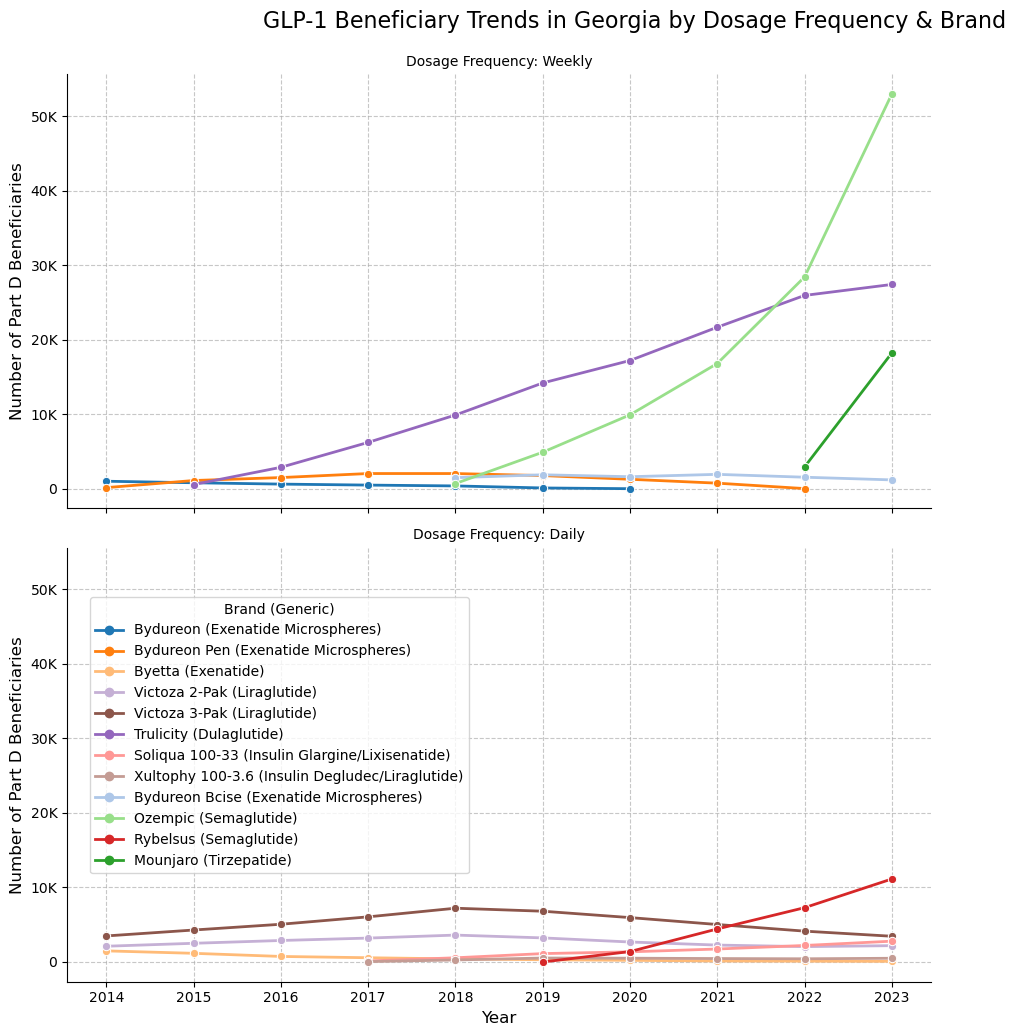

In [ ]:
# Aggregate by Year, Brand Name, Generic Name, Dosage Frequency
georgia_brand_agg = georgia_data.groupby(
    ['Year', 'Brnd_Name', 'Gnrc_Name', 'Dosage_Frequency'],dropna=False)[['Tot_Benes', 'Tot_Drug_Cst']].sum().reset_index()

print(georgia_brand_agg.head(10))
georgia_brand_agg['Display_Label'] = georgia_brand_agg['Brnd_Name'] + ' (' + georgia_brand_agg['Gnrc_Name'] + ')'
unique_display_labels = sorted(georgia_brand_agg['Display_Label'].unique())
palette_brand = sns.color_palette('tab20', n_colors=len(unique_display_labels))
color_map_brand = dict(zip(unique_display_labels, palette_brand))

g = sns.relplot(
    data=georgia_brand_agg,
    x='Year',
    y='Tot_Benes',
    hue='Display_Label',
    row='Dosage_Frequency',
    kind='line',
    marker='o',
    linewidth=2,
    palette=color_map_brand,
    height=5,
    aspect=2
)

g.fig.suptitle('GLP-1 Beneficiary Trends in Georgia by Dosage Frequency & Brand', y=1.03, fontsize=16)
g.set_axis_labels("Year", "Number of Part D Beneficiaries", fontsize=12) # X, Y axis lables
g.set_titles("Dosage Frequency: {row_name}", fontsize=20) # title for each plot
g.set(xticks=georgia_brand_agg['Year'].unique())

# Y-axis formatting and applying grid
def simple_formatter(x, pos):
    if x >= 1e6:
        return f'{x/1e6:.1f}M'
    elif x >= 1e3:
        return f'{x/1e3:.0f}K'
    else:
        return f'{x:.0f}'

for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(FuncFormatter(simple_formatter))
    ax.grid(True, linestyle='--', alpha=0.7)

# Brand(Generic) Legend positioning
sns.move_legend(g, "upper left", bbox_to_anchor=(0.1, 0.45), title='Brand (Generic)', frameon=True)
# Display plots
plt.show()


## 6. Conclusion
### 6.1. Summary
- <span style="font-size: 16px;">The number of Medicare Part D beneficiaries utilizing GLP-1 agonists has shown <b>a significant upward trend</b> year over year. This class of medications is primarily indicated for the treatment of type 2 diabetes and, more recently, for obesity management. Most medications within this class are administered via subcutaneous.</span>
- <span style="font-size: 16px;">Particularly noteworthy growth trends are observed for <b>Trulicity (Dulaglutide), Ozempic (Semaglutide), and Mounjaro (Tirzepatide)</b> since their respective introductions to the US market.</span>
- <span style="font-size: 16px;"><b>A key differentiator</b> identified among these rapidly growing GLP-1 agonists and others relates to <b>dosage frequency</b>. Analysis suggests a potential preference among Medicare beneficiaries for the convenience of once-weekly dosing regimens over once-daily options. This is supported by the pronounced growth trajectories observed for the once-weekly agents Trulicity, Ozempic, and Mounjaro compared to the daily administered agents analyzed.</span>
- <span style="font-size: 16px;"><b>An exception to this trend among weekly agents is Exenatide extended-release (Bydureon)</b>. While also administered weekly, its beneficiary count has not seen comparable growth. <b>Published clinical research often indicates lower comparative efficacy for Exenatide in A1C reduction and weight loss</b> compared to newer GLP-1 receptor agonists like Semaglutide, Dulaglutide, and Tirzepatide. This could be a contributing factor to the lower utilization of Exenatide, <b>potentially suggesting prescriber awareness of newer alternatives</b> within the same therapeutic class offering greater efficacy.</span>

### 6.2. Limitations
This data analysis has the following limitations:

1. <b>Data Source and Time Period</b>: The analysis is based solely on publicly available U.S. Medicare Part D prescriber data (by Geography and Drug). The data used covers the period from 2014 to 2023. As of the time of analysis (April 2025), public data for 2024 was not yet available and therefore is not included. Consequently, the most recent trends may not be reflected.
2. <b>Target Population</b>: The findings represent trends specific to the Medicare Part D beneficiary population. They may not be directly generalizable to trends among commercially insured patients or the entire U.S. population utilizing GLP-1 agonists, especially considering potential differences in usage patterns (e.g., for weight loss) which might be more prominent in the market.
3. <b>Data Granularity</b>: The data utilized is aggregated at the state or national level by drug. It does not contain individual patient-level information (e.g., comorbidities, specific indications like diabetes vs. weight loss, adherence, reasons for medication switching) or detailed individual prescriber data. This restricts the ability to perform in-depth analyses based on patient characteristics or individual prescriber behaviors.
4. <b>Correlation vs. Causation:</b> This analysis primarily identifies correlations and trends over time, such as shifts in market share or relationships with cost. While observations like the growing preference for once-weekly formulations were noted, this analysis cannot definitively establish causal relationships (e.g., it cannot prove convenience caused the preference without further study).
5. <b>External Factors:</b> Various external factors that could influence prescribing trends during the analysis period (e.g., changes in specific drug marketing efforts, formulary changes beyond basic cost-sharing tiers (e.g. copay), drug shortages, updates to clinical guidelines) were not directly accounted for in this analysis.
6. <b>Application of Domain Knowledge:</b> Dosage frequency information was added based on pharmacological expertise and standard clinical practice. This mapping may not capture variations in individual patient dosing regimens or potential off-label use present in the raw prescribing events.
